In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os 
import sys

sys.path.append('../../boxcox')
sys.path.append('../../comparison')
sys.path.append('../../dCor')
sys.path.append('../../local_maximal_corr')
sys.path.append('../../MCI')

from img_comparison import compare_images

from scipy.spatial import distance
from main_lmc import LocalMaximalCorr
from minepy import MINE
import dcor 

from scipy.stats import pearsonr

In [2]:
def get_all_comp(img_1, img_2, method = 'full'):

    comp = compare_images(img_1, img_2)

    # dcor
    dcorr_func = lambda x, y: dcor.distance_correlation(x, y)
    dcor_res = comp.compare_images(function=dcorr_func, comparison_method= method)

    dcov_func = lambda x, y: dcor.distance_covariance(x, y)
    dcov_res = comp.compare_images(function=dcov_func, comparison_method= method)

    # # lmc
    # lmc = lambda x, y: LocalMaximalCorr(x, y).local_maximal_corr()[0]
    # lmc_res = comp.compare_images(function=lmc, comparison_method= method)

    # mic
    def mic(x, y):
        m = MINE(alpha=0.6, c=15, est="mic_e")
        m.compute_score(x, y)
        return m.mic()
    
    mic_e = lambda x, y:  mic(x, y)
    mic_e_res = comp.compare_images(function=mic_e, comparison_method= method)

    # tic
    def tic(x, y):
        m = MINE(alpha=0.6, c=15, est="mic_e")
        m.compute_score(x, y)
        return m.tic()
    tic_e = lambda x, y:  tic(x, y)
    tic_e_res = comp.compare_images(function=tic_e, comparison_method= method)


    # corr
    corr = lambda x, y: pearsonr(x, y)[0]
    corr_res = comp.compare_images(function=corr, comparison_method= method)

    return dcor_res,dcov_res , mic_e_res, tic_e_res, corr_res


    

In [3]:
images_df_full = pd.DataFrame(columns=['n_image', 'lambda','dcor', 'dcov' ,  'mic', 'tic', 'pearson'])

images_df_hist = pd.DataFrame(columns=['n_image', 'lambda','dcor', 'dcov' ,  'mic', 'tic', 'pearson'])


In [4]:
# from box_cox_img import BoxCoxImg
# import matplotlib.pyplot as plt

# from tqdm import tqdm

# for i in tqdm([1,2,13, 22]):
#     img_path = f'../../boxcox/img/{i}.png'
    
#     BCI = BoxCoxImg(img_path)
#     # plt.imshow(BCI.bw_img, cmap='gray')
#     # plt.show()

#     for lmbda in np.linspace(-5, 5, 31):

#         #full
#         full_bc = BCI.transform(method='full', lam= lmbda)
#         # plt.imshow(full_bc, cmap='gray')
#         # plt.show()

#         plt.show()

#         dcor_full_full, dcov_full_full ,mic_full_full, tic_full_full, corr_full_full = get_all_comp(BCI.bw_img, full_bc, method='full')
#         print(f'full bc, full comp: dcor={dcor_full_full}, dcov={dcov_full_full}, mic={mic_full_full}, tic={tic_full_full}, corr={corr_full_full}')

#         dcor_hist_full, dcov_hist_full ,mic_hist_full, tic_hist_full, corr_hist_full = get_all_comp(BCI.bw_img, full_bc, method='hist')
#         print(f'full bc, hist comp: dcor={dcor_hist_full}, dcov={dcov_hist_full}, mic={mic_hist_full}, tic={tic_hist_full}, corr={corr_hist_full}')

#         images_df_full = pd.concat([images_df_full, pd.DataFrame([[i, lmbda, dcor_full_full, dcov_full_full, mic_full_full, tic_full_full, corr_full_full]]
#                                                                 , columns=images_df_full.columns)], ignore_index=True)
                                                                


#         images_df_hist = pd.concat([images_df_hist, pd.DataFrame([[i, lmbda, dcor_hist_full, dcov_hist_full, mic_hist_full, tic_hist_full, corr_hist_full]]
#                                                                 , columns=images_df_hist.columns)], ignore_index=True)
        
#     #     break
#     images_df_full.to_csv('./images_lam_df_full.csv')
#     images_df_hist.to_csv('./images_lam_df_hist.csv')
#     # break


# images_df_full.to_csv('./images_lam_df_full_end.csv')
# images_df_hist.to_csv('./images_lam_df_hist_end.csv')


images_df_full = pd.read_csv('./images_lam_df_full_end.csv', index_col=0)
images_df_hist = pd.read_csv('./images_lam_df_hist_end.csv', index_col=0)

In [5]:
images_df_full

n_image    lambda      dcor      dcov       mic           tic   pearson
0          1 -5.000000  0.000000  0.000000  0.020393    186.260475  0.121263
1          1 -4.666667  0.000000  0.000000  0.020393    186.260475  0.121263
2          1 -4.333333  0.000000  0.000000  0.020393    186.260475  0.121263
3          1 -4.000000  0.000000  0.000000  0.020393    186.260475  0.121263
4          1 -3.666667  0.000000  0.000000  0.020393    186.260475  0.121263
..       ...       ...       ...       ...       ...           ...       ...
119       22  3.666667  0.945256  0.074533  1.000000  13345.270160  0.861159
120       22  4.000000  0.931449  0.069970  1.000000  13345.273505  0.834720
121       22  4.333333  0.915789  0.065600  1.000000  13345.270007  0.808352
122       22  4.666667  0.898505  0.061481  1.000000  13345.268642  0.782483
123       22  5.000000  0.879937  0.057639  1.000000  13345.256739  0.757445

[124 rows x 7 columns]

In [6]:
images_df_hist

n_image    lambda      dcor        dcov       mic        tic   pearson
0          1 -5.000000  0.058016  107.205377  0.033981   0.664905 -0.038282
1          1 -4.666667  0.058016  107.205377  0.033981   0.664905 -0.038282
2          1 -4.333333  0.058016  107.205377  0.033981   0.664905 -0.038282
3          1 -4.000000  0.058016  107.205377  0.033981   0.664905 -0.038282
4          1 -3.666667  0.058016  107.205377  0.033981   0.664905 -0.038282
..       ...       ...       ...         ...       ...        ...       ...
119       22  3.666667  0.349172  482.388716  0.340981  10.348166 -0.276273
120       22  4.000000  0.343552  473.489316  0.399704  11.925573 -0.243343
121       22  4.333333  0.332137  456.222124  0.444524  13.188777 -0.207281
122       22  4.666667  0.317520  435.457038  0.476196  14.719284 -0.172845
123       22  5.000000  0.299753  410.835815  0.515419  15.611153 -0.145673

[124 rows x 7 columns]

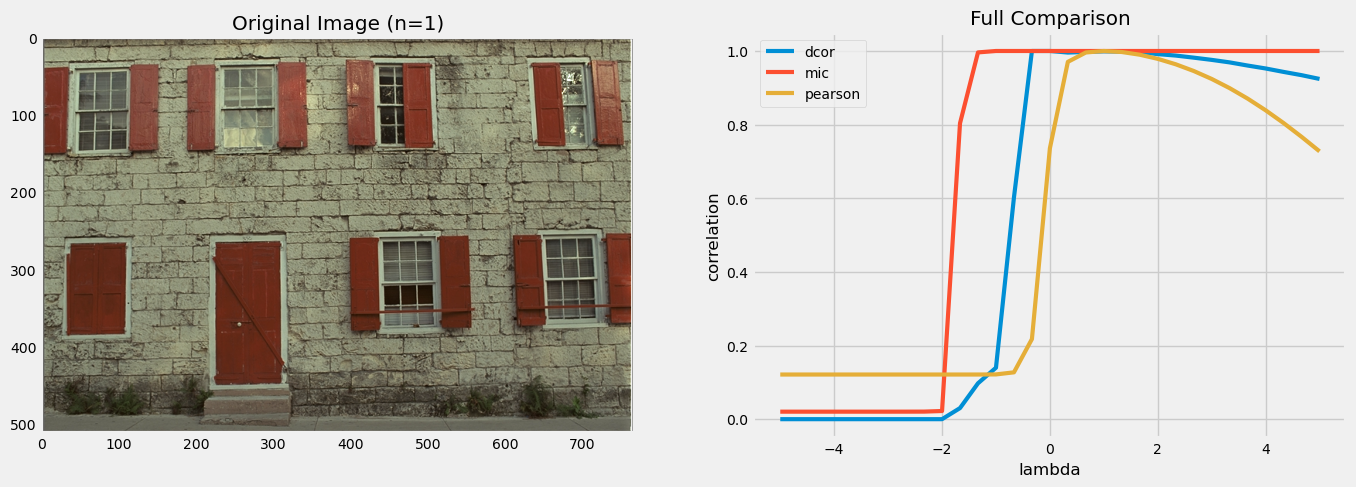

In [7]:
# plot lambda vs dcor, mic, pearson in df

n_im = 1

df_im = images_df_full[images_df_full['n_image'] == n_im]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

img_path = f'../../boxcox/img/{n_im}.png'
img = plt.imread(img_path)
ax[0].imshow(img)
ax[0].set_title(f'Original Image (n={n_im})')
#remove grid
ax[0].grid(False)

ax[1].plot(df_im['lambda'], df_im['dcor'].clip(0,1), label='dcor')
ax[1].plot(df_im['lambda'], df_im['mic'], label='mic')
ax[1].plot(df_im['lambda'], df_im['pearson'], label='pearson')
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('correlation')
ax[1].set_title(f'Full Comparison')
ax[1].legend()
plt.show()



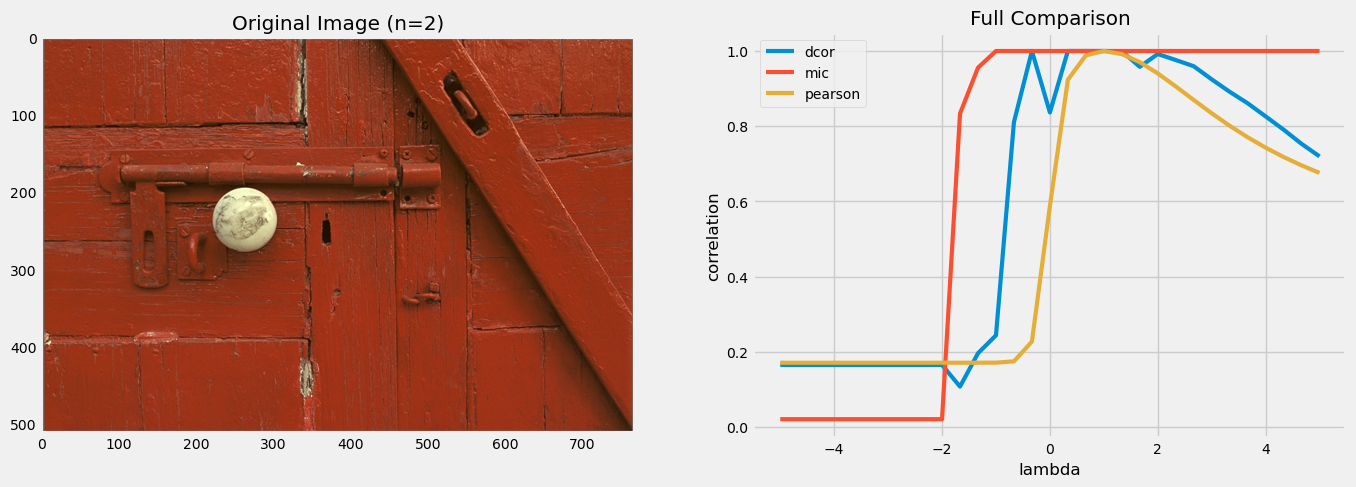

In [8]:
# plot lambda vs dcor, mic, pearson in df

n_im = 2

df_im = images_df_full[images_df_full['n_image'] == n_im]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

img_path = f'../../boxcox/img/{n_im}.png'
img = plt.imread(img_path)
ax[0].imshow(img)
ax[0].set_title(f'Original Image (n={n_im})')
#remove grid
ax[0].grid(False)

ax[1].plot(df_im['lambda'], df_im['dcor'].clip(0,1), label='dcor')
ax[1].plot(df_im['lambda'], df_im['mic'], label='mic')
ax[1].plot(df_im['lambda'], df_im['pearson'], label='pearson')
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('correlation')
ax[1].set_title(f'Full Comparison')
ax[1].legend()
plt.show()



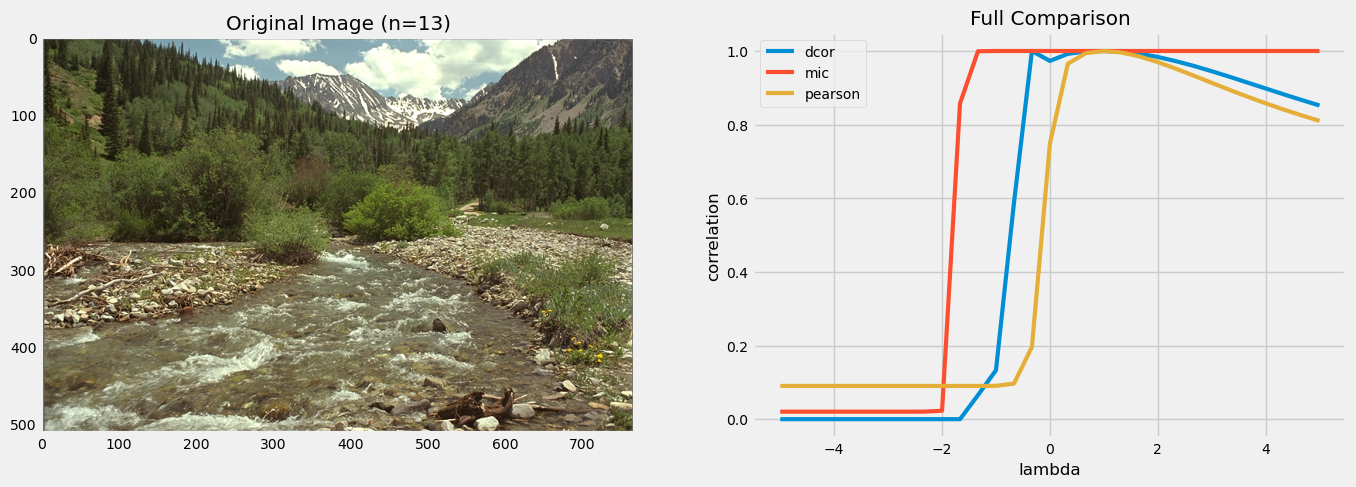

In [9]:
# plot lambda vs dcor, mic, pearson in df

n_im = 13

df_im = images_df_full[images_df_full['n_image'] == n_im]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

img_path = f'../../boxcox/img/{n_im}.png'
img = plt.imread(img_path)
ax[0].imshow(img)
ax[0].set_title(f'Original Image (n={n_im})')
#remove grid
ax[0].grid(False)

ax[1].plot(df_im['lambda'], df_im['dcor'].clip(0,1), label='dcor')
ax[1].plot(df_im['lambda'], df_im['mic'], label='mic')
ax[1].plot(df_im['lambda'], df_im['pearson'], label='pearson')
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('correlation')
ax[1].set_title(f'Full Comparison')
ax[1].legend()
plt.show()



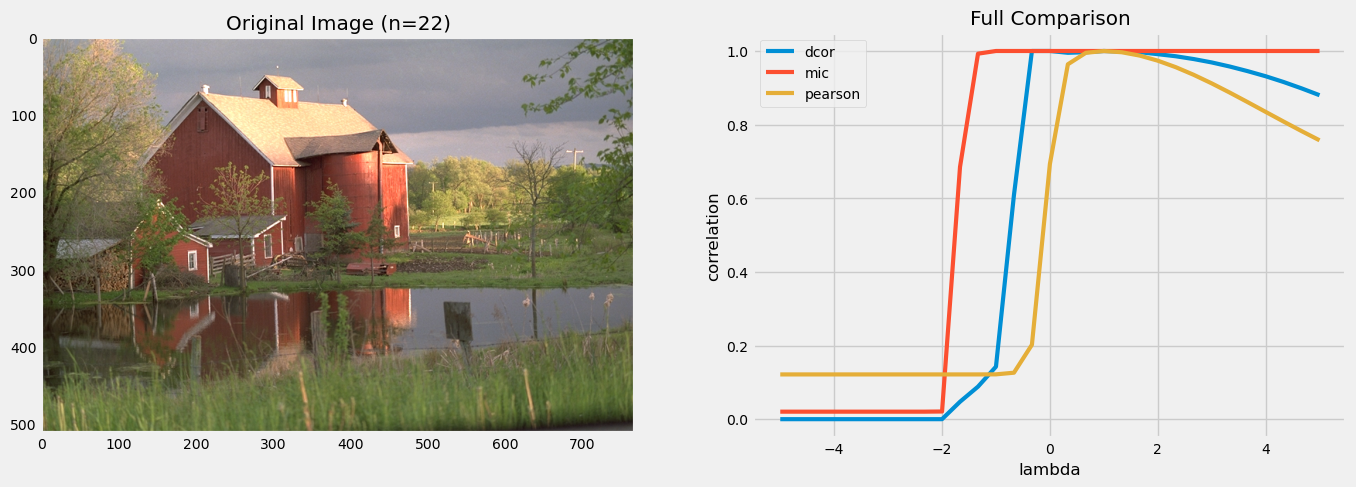

In [10]:
# plot lambda vs dcor, mic, pearson in df

n_im = 22

df_im = images_df_full[images_df_full['n_image'] == n_im]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

img_path = f'../../boxcox/img/{n_im}.png'
img = plt.imread(img_path)
ax[0].imshow(img)
ax[0].set_title(f'Original Image (n={n_im})')
#remove grid
ax[0].grid(False)

ax[1].plot(df_im['lambda'], df_im['dcor'].clip(0,1), label='dcor')
ax[1].plot(df_im['lambda'], df_im['mic'], label='mic')
ax[1].plot(df_im['lambda'], df_im['pearson'], label='pearson')
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('correlation')
ax[1].set_title(f'Full Comparison')
ax[1].legend()
plt.show()



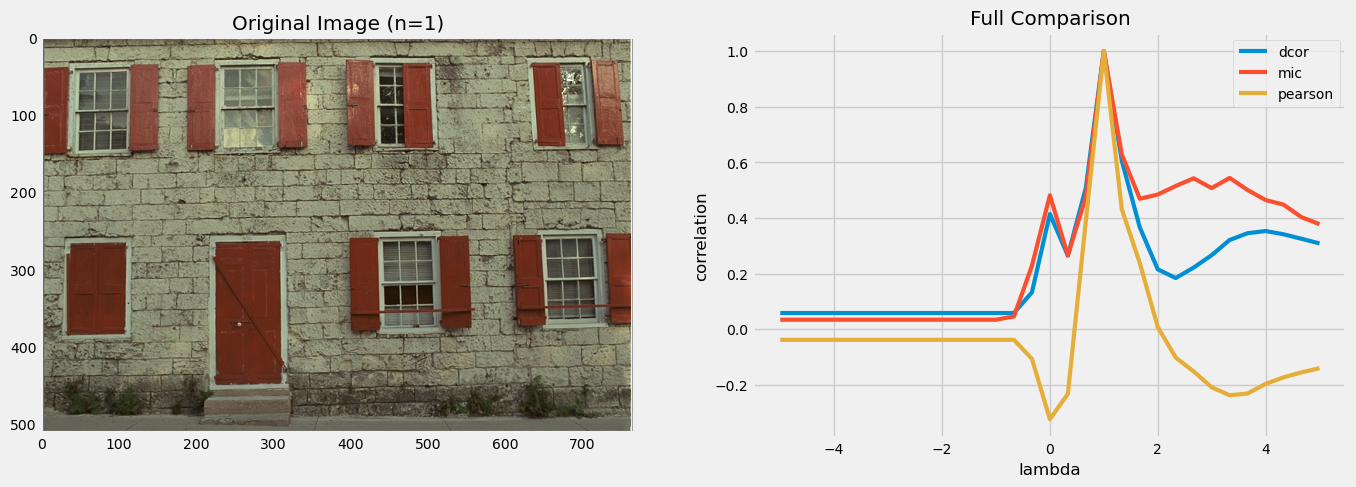

In [11]:
# plot lambda vs dcor, mic, pearson in df

n_im = 1

df_im = images_df_hist[images_df_hist['n_image'] == n_im]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

img_path = f'../../boxcox/img/{n_im}.png'
img = plt.imread(img_path)
ax[0].imshow(img)
ax[0].set_title(f'Original Image (n={n_im})')
#remove grid
ax[0].grid(False)

ax[1].plot(df_im['lambda'], df_im['dcor'].clip(0,1), label='dcor')
ax[1].plot(df_im['lambda'], df_im['mic'], label='mic')
ax[1].plot(df_im['lambda'], df_im['pearson'], label='pearson')
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('correlation')
ax[1].set_title(f'Full Comparison')
ax[1].legend()
plt.show()



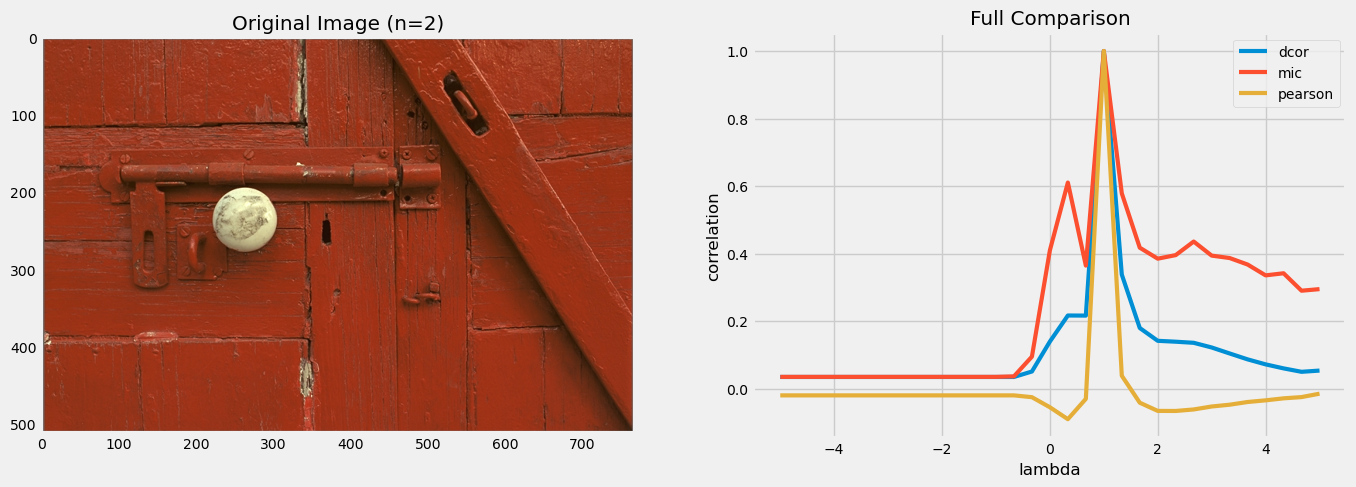

In [12]:
# plot lambda vs dcor, mic, pearson in df

n_im = 2

df_im = images_df_hist[images_df_hist['n_image'] == n_im]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

img_path = f'../../boxcox/img/{n_im}.png'
img = plt.imread(img_path)
ax[0].imshow(img)
ax[0].set_title(f'Original Image (n={n_im})')
#remove grid
ax[0].grid(False)

ax[1].plot(df_im['lambda'], df_im['dcor'].clip(0,1), label='dcor')
ax[1].plot(df_im['lambda'], df_im['mic'], label='mic')
ax[1].plot(df_im['lambda'], df_im['pearson'], label='pearson')
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('correlation')
ax[1].set_title(f'Full Comparison')
ax[1].legend()
plt.show()



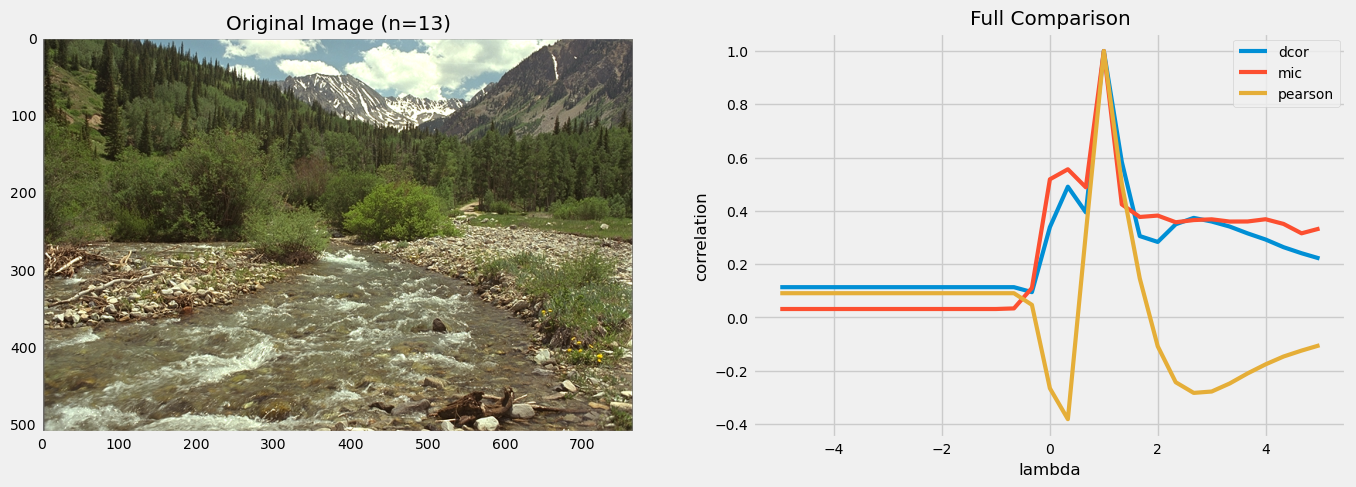

In [13]:
# plot lambda vs dcor, mic, pearson in df

n_im = 13

df_im = images_df_hist[images_df_hist['n_image'] == n_im]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

img_path = f'../../boxcox/img/{n_im}.png'
img = plt.imread(img_path)
ax[0].imshow(img)
ax[0].set_title(f'Original Image (n={n_im})')
#remove grid
ax[0].grid(False)

ax[1].plot(df_im['lambda'], df_im['dcor'].clip(0,1), label='dcor')
ax[1].plot(df_im['lambda'], df_im['mic'], label='mic')
ax[1].plot(df_im['lambda'], df_im['pearson'], label='pearson')
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('correlation')
ax[1].set_title(f'Full Comparison')
ax[1].legend()
plt.show()



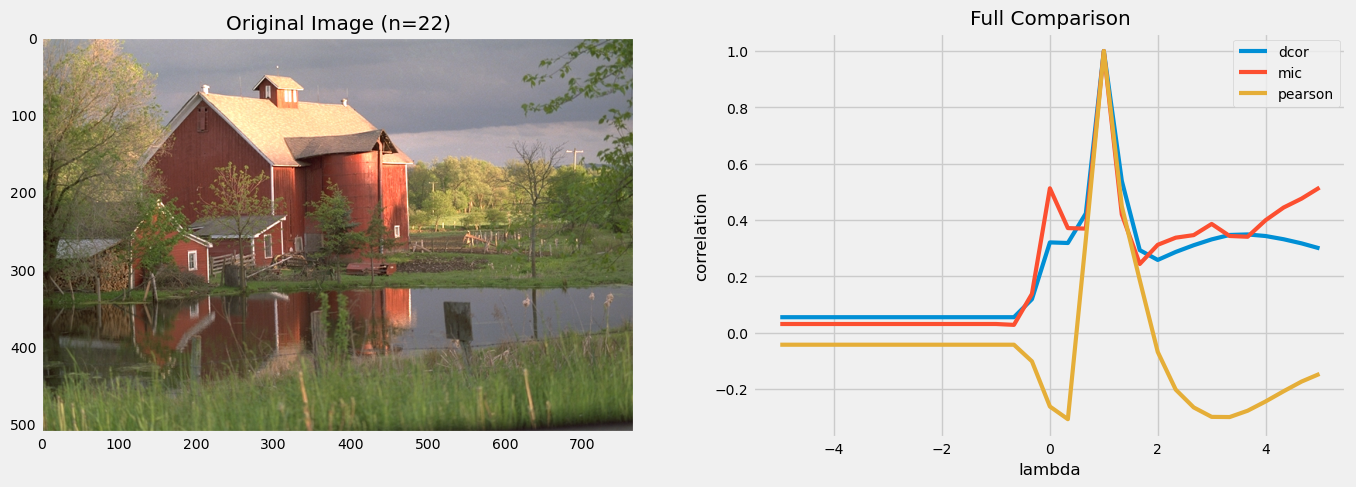

In [14]:
# plot lambda vs dcor, mic, pearson in df

n_im = 22

df_im = images_df_hist[images_df_hist['n_image'] == n_im]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

img_path = f'../../boxcox/img/{n_im}.png'
img = plt.imread(img_path)
ax[0].imshow(img)
ax[0].set_title(f'Original Image (n={n_im})')
#remove grid
ax[0].grid(False)

ax[1].plot(df_im['lambda'], df_im['dcor'].clip(0,1), label='dcor')
ax[1].plot(df_im['lambda'], df_im['mic'], label='mic')
ax[1].plot(df_im['lambda'], df_im['pearson'], label='pearson')
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('correlation')
ax[1].set_title(f'Full Comparison')
ax[1].legend()
plt.show()

